# SIT742: Modern Data Science 
**(2020 Assessment Task 02: Exploration FIFA2019 Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Group Information:** Please fill your information below

- Names with Student IDs:  
- Group ID:  
- Emails:   

---

## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

In this task, you will need to **use Spark packages**

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation;


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own complete code to implement the required tasks. But you should provide sufficient comments.



## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).


In [10]:
# Link to Dataset

#link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
#DataSet = wget.download(link_to_data)

In [11]:
# Importy necessary spark environment including spark sql:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()

df = spark.sql('''select 'spark' as hello ''')
df.show()


+-----+
|hello|
+-----+
|spark|
+-----+



### 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [12]:
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

df = spark.read.csv('2020T2Data.csv', sep = ',', header = True, ignoreLeadingWhiteSpace= True, ignoreTrailingWhiteSpace = True)
#df = spark.read.option("header", "true").csv("2020T2Data.csv")

df.head(1)
df.columns

[Row(ID='158023', Name='L. Messi', Age='31', Photo='https://cdn.sofifa.org/players/4/19/158023.png', Nationality='Argentina', Flag='https://cdn.sofifa.org/flags/52.png', Overall='94', Potential='94', Club='FC Barcelona', Club Logo='https://cdn.sofifa.org/teams/2/light/241.png', value(M)='110.5', wage(K)='565', Special='2202', Preferred Foot='Left', International Reputation='5', Weak Foot='4', Skill Moves='4', Work Rate='Medium/ Medium', Body Type='Messi', Real Face='Yes', Position='RF', Jersey Number='10', Joined='Jul 1, 2004', Loaned From=None, Contract Valid Until='2021', Height='5.70', Height(CM)='173.736', Weight='159.00', Weight(KG)='72.121128', Crossing='84', Finishing='95', HeadingAccuracy='70', ShortPassing='90', Volleys='86', Dribbling='97', Curve='93', FKAccuracy='94', LongPassing='87', BallControl='96', Acceleration='91', SprintSpeed='86', Agility='91', Reactions='95', Balance='95', ShotPower='85', Jumping='68', Stamina='72', Strength='59', LongShots='94', Aggression='48', I

['ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'value(M)',
 'wage(K)',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Jersey Number',
 'Joined',
 'Loaned From',
 'Contract Valid Until',
 'Height',
 'Height(CM)',
 'Weight',
 'Weight(KG)',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause(M)']

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Which position the talented player (based on Avg Overall) are playing? </li>
        <li> Which are the top 3 countres that most likely have the genies player (based on sort of Avg Overall) and </li>
    </ol>
    
</div>

</div>

In [16]:
from pyspark.sql import functions as F

#Creating a SqlContext on Spark Session Variable
sqlContext = SQLContext(spark)

#Creating a template for Spark SQL for the DataFrame df:

df.registerTempTable("df")

#sdf2 = sqlContext.read.csv('2020T2Data.csv', sep = ',', inferSchema = True, header = True, ignoreLeadingWhiteSpace= True, ignoreTrailingWhiteSpace = True)

In [62]:
# Statistics on Age:

age_results = sqlContext.sql("SELECT min(Age), mean(Age), max(Age) from df")
age_results.show()

+--------+------------------------+--------+
|min(Age)|avg(CAST(Age AS DOUBLE))|max(Age)|
+--------+------------------------+--------+
|      16|      25.122205745043114|      45|
+--------+------------------------+--------+



In [63]:
# Statistics on Overall:

overall_results = sqlContext.sql("SELECT min(Overall), mean(Overall), max(Overall) from df")
overall_results.show()

+------------+----------------------------+------------+
|min(Overall)|avg(CAST(Overall AS DOUBLE))|max(Overall)|
+------------+----------------------------+------------+
|          46|           66.23869940132916|          94|
+------------+----------------------------+------------+



In [64]:
# Code for which Avg Overall on Position?

position_results = sqlContext.sql("SELECT position, avg(Overall) from df group by position")
position_results.show()

+--------+----------------------------+
|position|avg(CAST(Overall AS DOUBLE))|
+--------+----------------------------+
|      RF|                       73.25|
|     LWB|           66.51282051282051|
|     LCM|           69.27088607594936|
|      LM|           66.69223744292238|
|     RDM|           69.75403225806451|
|      LF|           73.86666666666666|
|    null|           61.63333333333333|
|     CAM|           66.90396659707724|
|     RAM|           72.28571428571429|
|      LB|           65.85476550680787|
|      LW|           66.61679790026247|
|     RCM|             69.076726342711|
|      GK|           64.60345679012346|
|      RB|           66.05886909372579|
|      RS|           69.52216748768473|
|     LCB|           69.24074074074075|
|      CM|          63.729555236728835|
|      RW|           66.92972972972973|
|     RCB|           69.28398791540785|
|     CDM|            66.3132911392405|
+--------+----------------------------+
only showing top 20 rows



In [65]:
#Your Code to output top 3 countries most likely having good players
# Code for which Avg Overall on Country sorted by descending Avg Overall (displaying only top 3 countries)?

position_results = sqlContext.sql("SELECT Nationality, avg(Overall) from df group by 1 order by avg(Overall) desc limit 3")
position_results.show()

+--------------------+----------------------------+
|         Nationality|avg(CAST(Overall AS DOUBLE))|
+--------------------+----------------------------+
|United Arab Emirates|                        77.0|
|Central African Rep.|           73.33333333333333|
|              Israel|           72.14285714285714|
+--------------------+----------------------------+



****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Which position the young talented player (by Avg Potential) are playing in Australia? </li>
    </ol>
    
</div>

</div>

In [66]:
#Your code to identify top 10 countryes by alphabet

avg_potentials_country_position  = df.groupby(['Nationality','Position']).agg({'Potential':"AVG"}).sort(['AVG(Potential)'], ascending = False)
avg_potentials_country_position.show(10)

+--------------------+--------+-----------------+
|         Nationality|Position|   avg(Potential)|
+--------------------+--------+-----------------+
|              Poland|      CF|             88.0|
|            Slovakia|     LCM|             87.0|
|           Argentina|      RF|             87.0|
|             Belgium|      LF|             86.0|
|              Serbia|      LS|             86.0|
|             Morocco|     RAM|             86.0|
|              Russia|     LDM|             86.0|
|               Wales|     LDM|             86.0|
|             Croatia|     LCM|85.33333333333333|
|Central African Rep.|      CM|             85.0|
+--------------------+--------+-----------------+
only showing top 10 rows



In [61]:
#Your Code to identify which position has the most talend young players in Australia
# Filtering the spark dataframe: avg_potentials_country_position for Nationality = Australia and 
#sorted in descending order of avg(Potential) and displying the position with the top Avg(Potential)

avg_potentials_country_position.filter(avg_potentials_country_position['Nationality'] == 'Australia').sort(['avg(Potential)'], ascending = False).show(1)


+-----------+--------+--------------+
|Nationality|Position|avg(Potential)|
+-----------+--------+--------------+
|  Australia|     RDM|          77.0|
+-----------+--------+--------------+
only showing top 1 row



Interesting, is there a age that the player is fully relased his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggreate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. </li>
        <li> What you can find for the age at which the player is fully released his potential?
    </ol>
    
</div>

</div>

+---+-----------------+-----------------+
|Age|     avg(Overall)|   avg(Potential)|
+---+-----------------+-----------------+
| 29| 69.2460896767466|69.35766423357664|
| 42|             65.0|             65.0|
| 30|69.69574700109051|69.70010905125409|
| 34|69.53960396039604|69.53960396039604|
| 28|69.21344232515895| 69.4441416893733|
| 22|64.99402985074627|72.81940298507463|
| 35|68.13265306122449|68.13265306122449|
| 16|54.45238095238095|73.19047619047619|
| 31|69.85007072135785|69.85007072135785|
| 18|57.74180327868852|73.53005464480874|
+---+-----------------+-----------------+
only showing top 10 rows



pandas.core.frame.DataFrame

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Plot of Age and Avg(potential)')

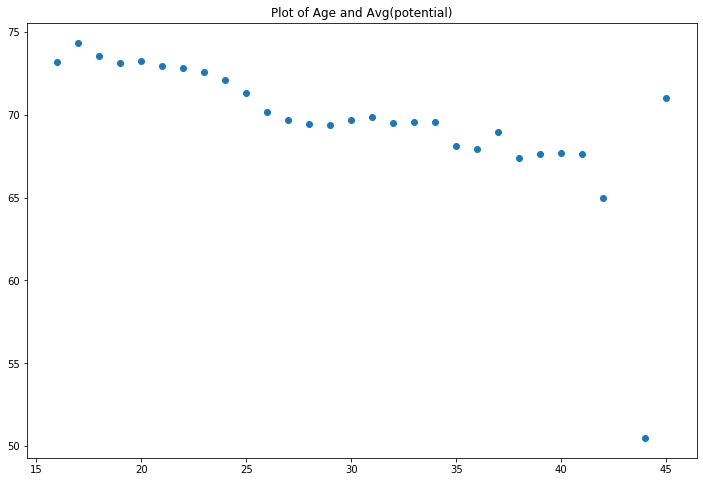

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Plot of Age and Avg(overall)')

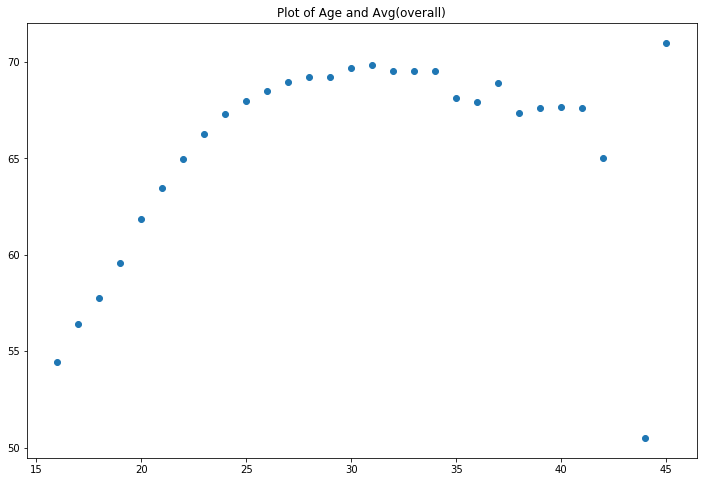

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Finding using plots : the age at which the player is fully released his potential

avgs_for_age  = df.groupby(['Age']).agg({'Potential':"AVG", 'Overall':"AVG"})
avgs_for_age.show(10)

pandas_avg = avgs_for_age.toPandas()

type(pandas_avg)


plt.figure(figsize=(12,8))
plt.title("Plot of Age and Avg(potential)")
plt.scatter(pd.to_numeric(pandas_avg['Age']), pandas_avg['avg(Potential)'])
plt.show()


plt.figure(figsize=(12,8))
plt.title("Plot of Age and Avg(overall)")
plt.scatter(pd.to_numeric(pandas_avg['Age']), pandas_avg['avg(Overall)'])
plt.show()

In [96]:
#pd.cut(pd.to_numeric(pandas_avg['Age']),5)

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Plot of  Avg(potential) and Avg(overall) with Age As colour')

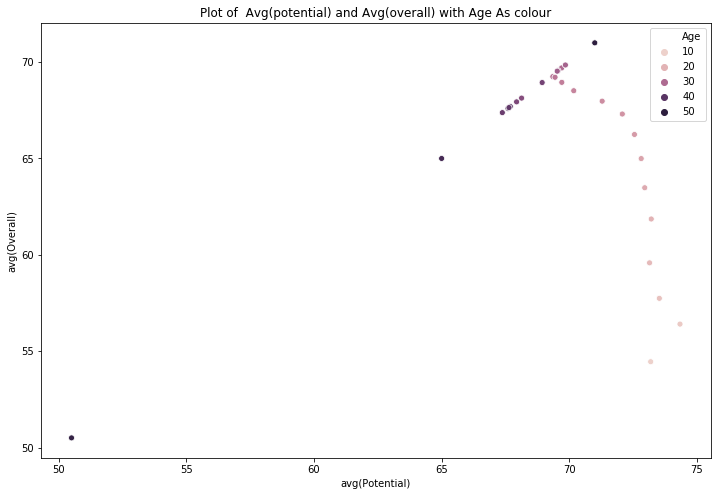

In [101]:
#plt.title("Plot of Avg(Overall) and Avg(Potential with Age") 
#plt.scatter(x = pandas_avg['avg(Potential)'],y =  pandas_avg['avg(Overall)'], c = pandas_avg['Age'] )
#plt.show()

plt.figure(figsize=(12,8))
plt.title("Plot of  Avg(potential) and Avg(overall) with Age As colour")
sns.scatterplot(x = pandas_avg['avg(Potential)'],y =  pandas_avg['avg(Overall)'], hue = pandas_avg['Age'] )


# From the above 3 plot we can clearly see that
#1. At the Age 15-25 is when the player has highest Potential and Potential Starts to go down after that Age
#2. Players Avg Overall start to rise after Age 20-30 and its max when player is in mid-30s 
#the Avg overall starting to decline around mid 30s in general

#3. In the Plot of Avg(potential) on X, Avg(Overall) on Y with Age as Colour we can insightfully see 
#the above #1 and #2 Together. 

# and how younger age players have the highest potential that starts to decline gradually,
#but at the higher age thier overall is mugh higher than younger players


## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for explore the player segmentation. 


### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and only use the skillset attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



In [ ]:
# Your code to select relevent features and filtering by leaving out the GK



To make the later stage easier, we define the position group by using the position feature.
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

In [ ]:
from pyspark.sql.functions import when,col

# Your code to complete
DEF= 
FWD=  
MID=  

# Your code here to create a new variable df_kmeans_new with a new column Position_Group, ..
#



Now, we remove the Position_Group and Position to create the feature for Kmeans




In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select('ID','features')
df_kmeans_.show(3)

Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2.A** In your report with proper section title  '2.2.A', Please include the elbow plot. 

  </div>

</div>



In [ ]:
cost = np.zeros(20)

for k in range(2,20):
# Your code


In [ ]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.set_xlabel('k')
ax.set_ylabel('cost')

# Your Code



### 2.2 K-Means

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2.B** In your report with proper section title  '2.2.B', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there any Position_Group belonging to particular Cluster?</li>
    </ol>

  </div>

</div>




In [ ]:
k = 8

# Your code

In [ ]:
from pyspark.sql import SQLContext

# Your code

## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skillset values to segment the players into 8 clusters. Now we want to see whether we could accuratly predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and use all other skillset features and the cluster prediction as the input for the model. Your target for classification is "Position_Group".

In [ ]:
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','Cluster']


vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_kmeans_pred_).select('features','Position_Group')
df_class_.show(3)


In many data science modeling work, feature scaling is very important.
In here, we use standard scaling on the fetaures.

In [ ]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [ ]:
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

### 3.2 Training Test Evaluation

We remove the feature of position and use all other skillset features and the cluster prediction as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

In [ ]:
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Target","prediction").show(10)


****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3.A** In your report with proper section title  '3.3.A', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>

</div>




In [ ]:
from sklearn.metrics import confusion_matrix


# Your Code


In [ ]:
from sklearn.metrics import classification_report

# Your Code



### 3.3 K-fold Cross-Validation

We surely missed something during the modeling work -- Hyperparameter tuning! We can use K-fold cross validation to find out the best hyperparameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for three (any three) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3.B** In your report with proper section title  '3.3.B', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyperparameters based on this cross-validation results</li>
        <li> Any difficuties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>

</div>



In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Your code 


In [ ]:
# Your code